In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Inspect Tables 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

#Exploratory Climate Analysis

In [15]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [16]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

('2017-08-23',)


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = session.query(Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
print(precip_data)

[('2016-08-23',), ('2016-08-23',), ('2016-08-23',), ('2016-08-23',), ('2016-08-23',), ('2016-08-23',), ('2016-08-23',), ('2016-08-24',), ('2016-08-24',), ('2016-08-24',), ('2016-08-24',), ('2016-08-24',), ('2016-08-24',), ('2016-08-24',), ('2016-08-25',), ('2016-08-25',), ('2016-08-25',), ('2016-08-25',), ('2016-08-25',), ('2016-08-25',), ('2016-08-25',), ('2016-08-26',), ('2016-08-26',), ('2016-08-26',), ('2016-08-26',), ('2016-08-26',), ('2016-08-26',), ('2016-08-27',), ('2016-08-27',), ('2016-08-27',), ('2016-08-27',), ('2016-08-27',), ('2016-08-27',), ('2016-08-28',), ('2016-08-28',), ('2016-08-28',), ('2016-08-28',), ('2016-08-28',), ('2016-08-28',), ('2016-08-29',), ('2016-08-29',), ('2016-08-29',), ('2016-08-29',), ('2016-08-29',), ('2016-08-29',), ('2016-08-29',), ('2016-08-30',), ('2016-08-30',), ('2016-08-30',), ('2016-08-30',), ('2016-08-30',), ('2016-08-30',), ('2016-08-31',), ('2016-08-31',), ('2016-08-31',), ('2016-08-31',), ('2016-08-31',), ('2016-08-31',), ('2016-08-31'

In [18]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print ("1 year ago from the last data point:",one_year_ago)

1 year ago from the last data point: 2016-08-23


In [19]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).\
     filter(func.strftime("%Y-%m-%d", Measurement.date) >=dt.date(2016,8,23)).all()
print(precip_scores)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_table = pd.DataFrame(precip_scores, columns = ["date", "precipitation"])

precip_table.set_index("date",inplace = True)

precip_table.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [21]:
# Sort the dataframe by date
precip_table = precip_table.sort_values(by = "date")
precip_table.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


C:\Users\donic\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


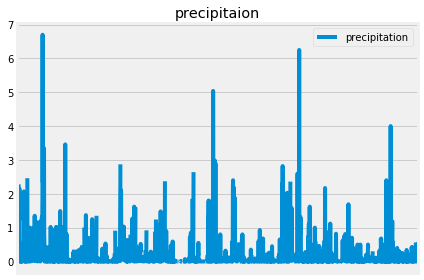

<Figure size 432x288 with 0 Axes>

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_table.plot(title="precipitaion")
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.tight_layout()
plt.show()


plt.savefig("../Homework 8/Precipitation.png")

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_table.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
print(stations)

9


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_c = session.query(Measurement.station, func.count(Station.id)).\
    join (Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Station.id).desc()).all()
print(stations_c)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281')

print(f"Lowest Temps: {temps[0][0]}")
print(f"Highest Temps: {temps[0][1]}")
print(f"Avg. Temps:{temps[0][2]}")      

Lowest Temps: 54.0
Highest Temps: 85.0
Avg. Temps:71.66378066378067


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_det = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station =='USC00519281').\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >=dt.date(2016,8,23)).all()

temperature = pd.DataFrame(temp_det, columns = ["date","temps"])

temperature.set_index("date",inplace = True)

temperature.head()

,temps
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


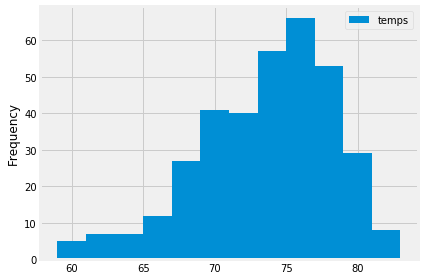

<Figure size 432x288 with 0 Axes>

In [28]:
temperature.plot(kind="hist", bins=12)
plt.tight_layout()
plt.show()

plt.savefig("../Homework 8/Temperatures.png")

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation_temps = calc_temps("2017-03-11","2017-03-18")

print(f"Lowest Temps: {vacation_temps[0][0]}")
print(f"Avg.Temps: {vacation_temps[0][1]}")
print(f"Highest Temps:{vacation_temps[0][2]}")    

Lowest Temps: 65.0
Avg.Temps: 71.91836734693878
Highest Temps:82.0


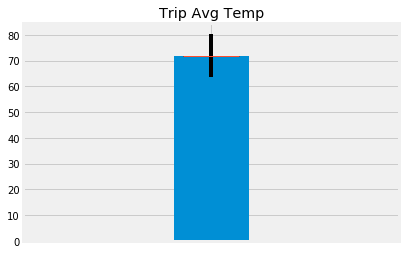

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

peak_peak = vacation_temps[0][2] - vacation_temps[0][0]
average_temp = vacation_temps[0][1]

import numpy as np

fig, ax = plt.subplots()

ax.bar(1, average_temp, yerr = peak_peak/2, width = 0.2)
ax.boxplot(average_temp, patch_artist=True)
ax.set_title('Trip Avg Temp')
ax.set_xticklabels([""])
ax.set_xticks([1])
plt.show()

plt.savefig("../Homework 8/TripAvgTemp")

## Optional Challenge Assignment

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
